# setup

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
TYPE_FLOAT = np.float32

# Data

[7.1.3. Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

> Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.
>  
> Note: Each of these 10 feature variables have been **mean centered and scaled** by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).
> 
> **y** is a quantitative measure of disease progression one year after baseline

1. age age in years
2. sex
3. bmi body mass index
4. bp average blood pressure
5. s1 tc, total serum cholesterol
6. s2 ldl, low-density lipoproteins
7. s3 hdl, high-density lipoproteins
8. s4 tch, total cholesterol / HDL
9. s5 ltg, possibly log of serum triglycerides level
10. s6 glu, blood sugar level


In [3]:
X, y = load_diabetes(return_X_y=True)
print(f"X shape {X.shape} y shape {y.shape}")

X shape (442, 10) y shape (442,)


In [4]:
df = pd.DataFrame(X)
df.columns = ['age', 'gender', 'bmi', 'pressure', 'cholesterol', 's2', 's3', 's4', 's5', 's6']
df.head(5)

,age,gender,bmi,pressure,cholesterol,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


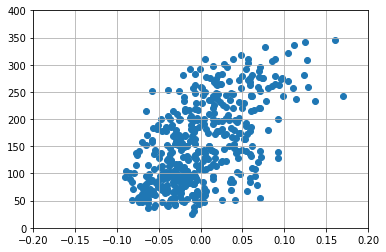

In [5]:
X_age = X[:, 0]
X_sex = X[:, 1]
X_bmi = X[:, 2]
plt.scatter(X_bmi, y)
plt.xlim(-0.2, 0.2)
plt.ylim(0, 400)
plt.grid()

In [6]:
X = X_bmi
y = y.reshape((-1, 1))


X_train = X[:-20].reshape((-1, 1))
X_test = X[-20:].reshape((-1, 1))
y_train = y[:-20]
y_test = y[-20:]


print(f"X_train shape: {X_train.shape}, y_train shape {y_train.shape}")

X_train shape: (422, 1), y_train shape (422, 1)


# Scikit Learn LinearRegression

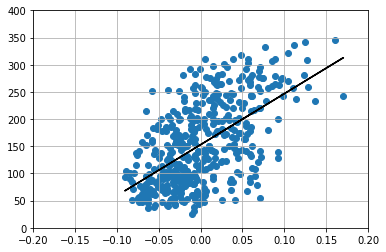

In [8]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

plt.scatter(X_bmi, y)
plt.plot(X_train[:, 0], reg.predict(X_train), color="k")
plt.xlim(-0.2, 0.2)
plt.ylim(0, 400)
plt.grid()

In [9]:
r2_score(y_test, reg.predict(X_test))

0.47257544798227147

# R2 Score

In [11]:
# R2 = 1 - Variance(y - y_predict) / Variance(y)

# Mean of y
y_mean: np.ndarray = y_test.mean(axis=0)

# Get the variance of y for each feature
Vy: np.ndarray = np.sum((y_test - y_mean)**2) / (len(y_test) -1)
print(f"variance y: {Vy}")

# Get the variance of y_predict
y_predict: np.ndarray = reg.predict(X_test)
Vy_predict: np.ndarray = np.sum((y_predict - y_test)**2) / (len(y_test) -1)
print(f"variance y_predict: {Vy_predict}")

    
# R2 score
R2 = 1 - (Vy_predict / Vy)
R2

variance y: 5085.431578947369
variance y_predict: 2682.1814723431257


0.4725754479822716

In [12]:
def compute_r2(y_true, y_predicted):
    sse = sum((y_true - y_predicted)**2)
    print(f"sse: {sse}")
    tse = (len(y_true) - 1) * np.var(y_true, ddof=1)
    print(f"tse: {tse}")
    r2_score = 1 - (sse / tse)
    return r2_score, sse, tse

In [13]:
compute_r2(y_test, y_predict)

sse: [50961.44797452]
tse: 96623.20000000001


(array([0.47257545]), array([50961.44797452]), 96623.20000000001)